In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress
import pymannkendall as mk
import joblib
import datetime as dt
import matplotlib.gridspec as gridspec
from pathlib import Path
import joblib

In [105]:
notebook_path = Path.cwd()
base_path = notebook_path.parent.parent

silver_path = base_path / "data" / "silver"
plots_path = base_path / "plots"

In [66]:
# Load and preprocess
mk_2d = pd.read_csv(silver_path / "silver_mk_2d.csv")
mk_1d = pd.read_csv(silver_path / "silver_mk_1d.csv")

ita_2d = pd.read_csv(silver_path / "silver_ita_2d.csv")
ita_1d = pd.read_csv(silver_path / "silver_ita_1d.csv")

sen_2d = pd.read_csv(silver_path / "silver_sen_slope_2d.csv")
sen_1d = pd.read_csv(silver_path / "silver_sen_slope_1d.csv")

smk_1d = pd.read_csv(silver_path / "silver_smk_1d.csv")

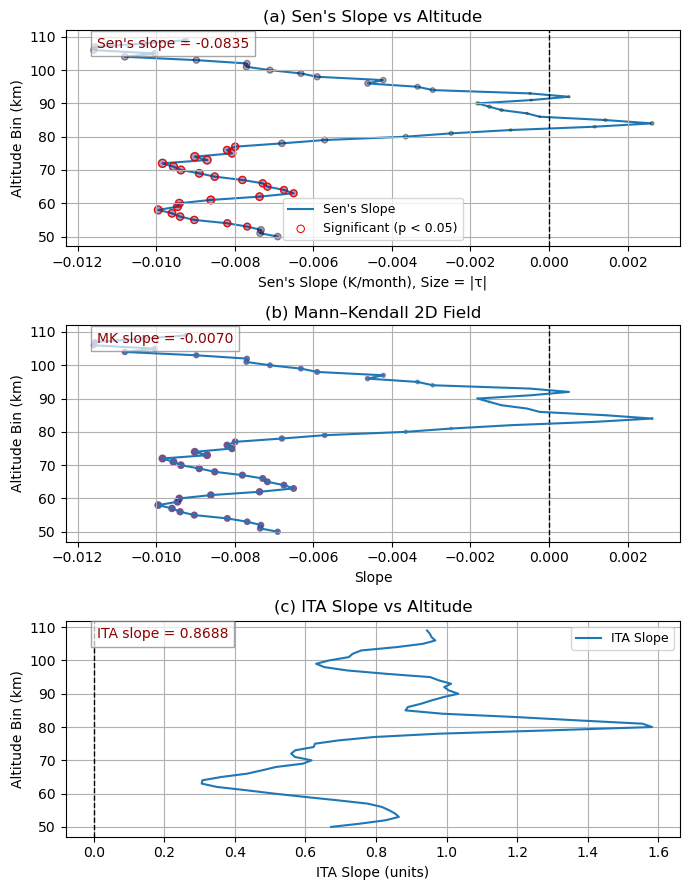

In [109]:
# --- Extract slopes and intercepts ---
sen_slope = sen_1d['sen_slope'].iloc[0]
mk_slope = mk_1d['slope'].iloc[0]
ita_slope = ita_1d['ita_slope'].iloc[0]

# --- Create figure with 3 subplots ---
fig, axes = plt.subplots(3, 1, figsize=(7, 9), sharex=False)

# -----------------------------
# (a) Sen’s slope vs altitude
# -----------------------------
ax1 = axes[0]
ax1.axvline(x=0, color='black', linestyle='--', linewidth=1)
ax1.plot(mk_2d['slope'], mk_2d['altitude_bin'], label="Sen's Slope", zorder=1)
# Scatter plot with p-value as color, |τ| as size
sizes = np.abs(mk_2d['tau']) * 300
scatter = ax1.scatter(
    mk_2d['slope'], mk_2d['altitude_bin'],
    c=mk_2d['p'], cmap='viridis', s=sizes,
    edgecolors='k', alpha=0.4
)

# Highlight significant points
significant = mk_2d['p'] < 0.05
ax1.scatter(
    mk_2d[significant]['slope'], mk_2d[significant]['altitude_bin'],
    facecolors='none', edgecolors='red',
    s=np.abs(mk_2d[significant]['tau']) * 300, linewidths=0.75,
    label='Significant (p < 0.05)'
)


ax1.set_xlabel("Sen's Slope (K/month), Size = |τ|")
ax1.set_ylabel("Altitude Bin (km)")
ax1.set_title("(a) Sen's Slope vs Altitude")
ax1.grid(True)
ax1.legend(fontsize=9)

# Slope annotation
ax1.text(
    0.05, 0.92,
    f"Sen's slope = {sen_slope:.4f}",
    transform=ax1.transAxes,
    fontsize=10,
    color='darkred',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
)

# -----------------------------
# (b) Mann–Kendall 2D field
# -----------------------------
ax2 = axes[1]
ax2.axvline(x=0, color='black', linestyle='--', linewidth=1)

# Correct: scatter with color and size
ax2.plot(
    mk_2d['slope'], mk_2d['altitude_bin']
)

ax2.scatter(
    mk_2d['slope'], mk_2d['altitude_bin'],
    c=mk_2d['p'], cmap='viridis',
    s=np.abs(mk_2d['tau']) * 300,
    alpha=0.7, edgecolors='none'
)

ax2.set_xlabel("Slope")
ax2.set_ylabel("Altitude Bin (km)")
ax2.set_title("(b) Mann–Kendall 2D Field")
ax2.grid(True)

# Slope annotation
ax2.text(
    0.05, 0.92,
    f"MK slope = {mk_slope:.4f}",
    transform=ax2.transAxes,
    fontsize=10,
    color='darkred',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
)

# -----------------------------
# (c) ITA slope vs altitude
# -----------------------------
ax3 = axes[2]
ax3.axvline(x=0, color='black', linestyle='--', linewidth=1)
ax3.plot(ita_2d['ita_slope'], ita_2d['altitude_bin'], color='tab:blue', label='ITA Slope')

ax3.set_xlabel("ITA Slope (units)")
ax3.set_ylabel("Altitude Bin (km)")
ax3.set_title("(c) ITA Slope vs Altitude")
ax3.grid(True)
ax3.legend(fontsize=9)

# Slope annotation
ax3.text(
    0.05, 0.92,
    f"ITA slope = {ita_slope:.4f}",
    transform=ax3.transAxes,
    fontsize=10,
    color='darkred',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
)

# Final layout
plt.tight_layout()
plt.savefig(plots_path / "MK_and_ITA.png", format='png', dpi=300, bbox_inches='tight')
plt.show()
